<a href="https://colab.research.google.com/github/Sajish06/task4/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
!pip install -q imbalanced-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, accuracy_score
)
from sklearn.metrics import precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE

In [4]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df = df.copy()
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

if 'diagnosis' not in df.columns:
    raise KeyError("Expected column 'diagnosis' not found in data.csv")

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
if df['diagnosis'].isnull().any():
    df['diagnosis'] = pd.to_numeric(df['diagnosis'])

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].astype(int)

obj_cols = X.select_dtypes(include=['object','category']).columns.tolist()
if obj_cols:
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

print("Chosen target: 'diagnosis' (M=1 malignant, B=0 benign)")
print("Dropped columns: id, Unnamed: 32 (if present)")
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())
display(X.columns[:30])


Chosen target: 'diagnosis' (M=1 malignant, B=0 benign)
Dropped columns: id, Unnamed: 32 (if present)
X shape: (569, 30)
y distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
print("Missing values per column:\n", X.isnull().sum().sort_values(ascending=False).head(10))
display(X.describe().T)


Missing values per column:
 radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [16]:
RND = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RND, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class dist:\n", y_train.value_counts(normalize=True))
print("Test class dist:\n", y_test.value_counts(normalize=True))


Train shape: (455, 30) Test shape: (114, 30)
Train class dist:
 diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Test class dist:
 diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_imp = SimpleImputer(strategy='mean')
X_train_imp = num_imp.fit_transform(X_train)
X_test_imp  = num_imp.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

print("Imputation and scaling done. Shapes:", X_train_scaled.shape, X_test_scaled.shape)

Imputation and scaling done. Shapes: (455, 30) (114, 30)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, solver='liblinear', random_state=RND)
model.fit(X_train_scaled, y_train)
print("Model trained. Coef shape:", model.coef_.shape)


Model trained. Coef shape: (1, 30)


In [19]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Accuracy: 0.9736842105263158

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[71  1]
 [ 2 40]]


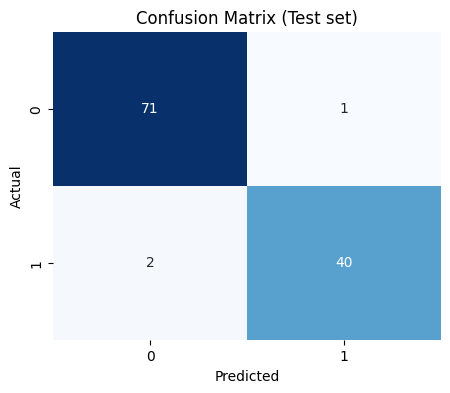

In [20]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test set)')
plt.show()

ROC AUC: 0.996031746031746


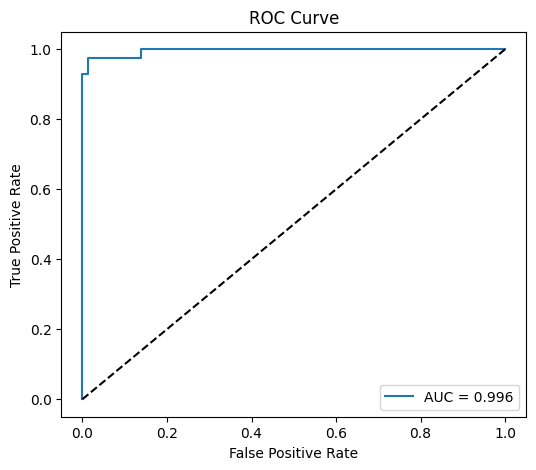

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc_score)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

PR AUC: 0.994214569817921


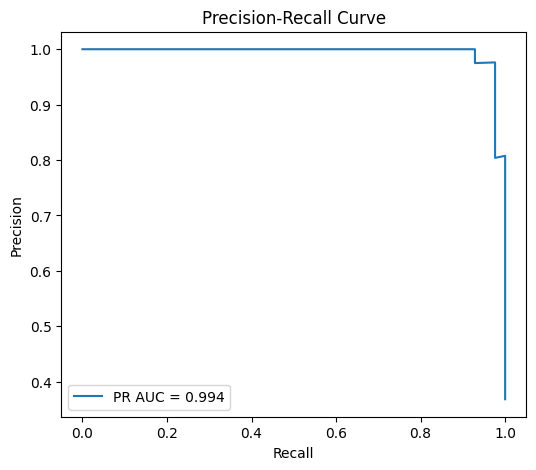

In [22]:
from sklearn.metrics import precision_recall_curve, auc as calc_auc
prec, rec, pr_thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = calc_auc(rec, prec)
print("PR AUC:", pr_auc)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

def metrics_at_threshold(th):
    y_th = (y_proba >= th).astype(int)
    return {
        'threshold': th,
        'precision': precision_score(y_test, y_th),
        'recall': recall_score(y_test, y_th),
        'f1': f1_score(y_test, y_th)
    }

thresholds = np.linspace(0.1, 0.9, 9)
results = [metrics_at_threshold(t) for t in thresholds]
import pandas as pd
res_df = pd.DataFrame(results)
display(res_df)

,threshold,precision,recall,f1
0,0.1,0.891304,0.976190,0.931818
1,0.2,0.911111,0.976190,0.942529
2,0.3,0.976190,0.976190,0.976190
3,0.4,0.975610,0.952381,0.963855
4,0.5,0.975610,0.952381,0.963855
5,0.6,1.000000,0.904762,0.950000
6,0.7,1.000000,0.904762,0.950000
7,0.8,1.000000,0.857143,0.923077
8,0.9,1.000000,0.785714,0.880000


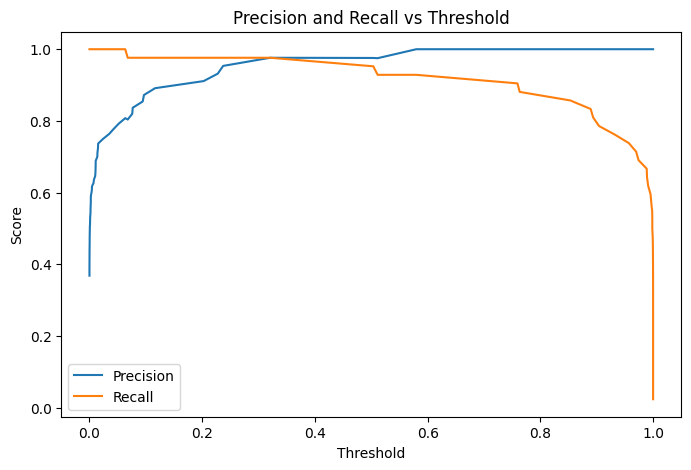

In [24]:
thresholds_for_plot = np.append(pr_thresholds, 1.0)  # pad to match prec/rec length
plt.figure(figsize=(8,5))
plt.plot(thresholds_for_plot[:-1], prec[:-1], label='Precision')
plt.plot(thresholds_for_plot[:-1], rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.show()

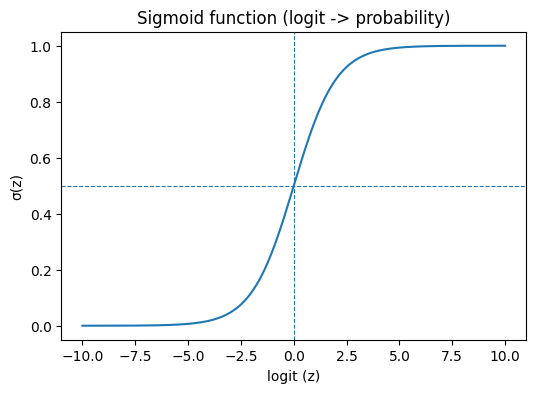

Most influential feature (by abs coef): texture_worst


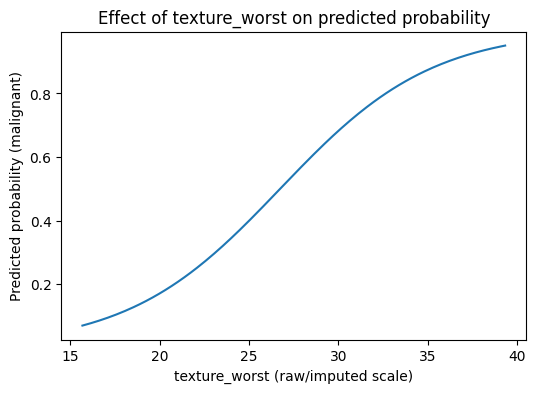

In [25]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z))
plt.axvline(0, linestyle='--', linewidth=0.8)
plt.axhline(0.5, linestyle='--', linewidth=0.8)
plt.title('Sigmoid function (logit -> probability)')
plt.xlabel('logit (z)')
plt.ylabel('σ(z)')
plt.show()

# Show effect for the top coefficient feature
coefs = model.coef_[0]
top_idx = np.abs(coefs).argmax()
feature_name = X.columns[top_idx]
print("Most influential feature (by abs coef):", feature_name)

X_train_np = np.array(X_train)
baseline = np.nanmean(X_train_imp, axis=0)
grid_raw = np.linspace(np.nanpercentile(X_train_imp[:, top_idx], 2),
                       np.nanpercentile(X_train_imp[:, top_idx], 98), 200)
logits = []
for val in grid_raw:
    vec = baseline.copy()
    vec[top_idx] = val
    vec_scaled = scaler.transform(vec.reshape(1, -1))[0]
    logit = model.intercept_[0] + np.dot(model.coef_[0], vec_scaled)
    logits.append(logit)
probs = sigmoid(np.array(logits))
plt.figure(figsize=(6,4))
plt.plot(grid_raw, probs)
plt.xlabel(f"{feature_name} (raw/imputed scale)")
plt.ylabel("Predicted probability (malignant)")
plt.title(f"Effect of {feature_name} on predicted probability")
plt.show()

In [26]:
print("Pipeline complete.")
print("Target: diagnosis (M=1 malignant, B=0 benign)")
print("Features used:", X.shape[1])
print("Suggested next steps: try regularization tuning (C param), cross-validation, or more advanced models (RandomForest/XGBoost).")

Pipeline complete.
Target: diagnosis (M=1 malignant, B=0 benign)
Features used: 30
Suggested next steps: try regularization tuning (C param), cross-validation, or more advanced models (RandomForest/XGBoost).
